In [176]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

# Reading the data

In [177]:
#Read excel file and convert into Dataframe
data=pd.read_excel(r'D:\DataTrained\Flip Robo Technology Internship\Flight Price Prediction\Flight Price Exracted Data.xlsx')
data

,Airline,Date of Journey,Month of Journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
0,Air Asia,1,November,Delhi,Mumbai,20:10,02:20,06h 10m,1 Stop,7011
1,Air Asia,1,November,Delhi,Mumbai,20:10,04:00,07h 50m,1 Stop,7011
2,Air Asia,1,November,Delhi,Mumbai,20:10,06:55,10h 45m,1 Stop,7011
3,Go Air,1,November,Delhi,Mumbai,22:30,00:40,02h 10m,Non Stop,7253
4,Air Asia,1,November,Delhi,Mumbai,13:35,04:00,14h 25m,2 Stop,7445
...,...,...,...,...,...,...,...,...,...,...
2265,Vistara,29,December,Banglore,Mumbai,18:15,18:50,24h 35m,2 Stop,20469
2266,Air India,29,December,Banglore,Mumbai,18:35,08:55,14h 20m,2 Stop,21315
2267,Vistara,29,December,Banglore,Mumbai,11:25,15:55,04h 30m,1 Stop,24738
2268,Indigo Air,29,December,Banglore,Mumbai,12:05,21:20,09h 15m,1 Stop,27860


In [178]:
#shape of file
data.shape

(2270, 10)

In [179]:
#Lets see the columns present in the dataset
data.columns

Index(['Airline', 'Date of Journey', 'Month of Journey', 'Source',
       'Destination', 'Departure Time', 'Arrival Time', 'Duration',
       'Total Stops', 'Price'],
      dtype='object')

In [180]:
# Checking for data types of the columns
data.dtypes

Airline             object
Date of Journey      int64
Month of Journey    object
Source              object
Destination         object
Departure Time      object
Arrival Time        object
Duration            object
Total Stops         object
Price               object
dtype: object

In [181]:
# Checking for null values
data.isnull().sum()

Airline             0
Date of Journey     0
Month of Journey    0
Source              0
Destination         0
Departure Time      0
Arrival Time        0
Duration            0
Total Stops         0
Price               0
dtype: int64

In [182]:
# Checking for null values in object datatype columns

for column in data:
    data[column]=data[column].replace(" ",np.nan)
    data[column]=data[column].replace("-- ",np.nan)
    data[column]=data[column].replace("--",np.nan)

In [183]:
# Checking for null values
data.isnull().sum()

Airline             0
Date of Journey     0
Month of Journey    0
Source              0
Destination         0
Departure Time      0
Arrival Time        0
Duration            0
Total Stops         0
Price               0
dtype: int64

# Visualization of the Data and Encoding object data

Vistara       959
Air India     518
Indigo Air    398
IndiGo        164
Air Asia      100
Go Air         81
Spice Jet      29
Akasa Air      14
Go First        5
SpiceJet        2
Name: Airline, dtype: int64


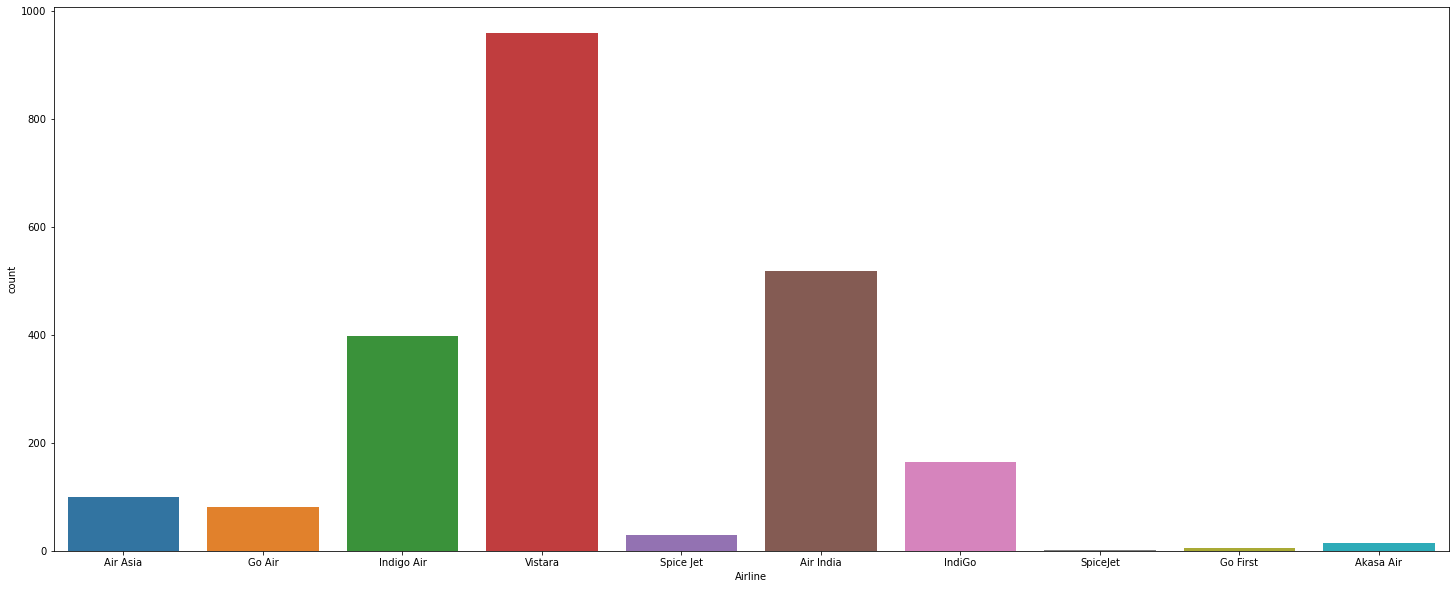

In [184]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Airline", data=data)
print(data["Airline"].value_counts())

In [185]:
#Replacing redundant airline names
data['Airline']=data['Airline'].replace('Indigo Air', 'IndiGo')
data['Airline']=data['Airline'].replace('Go First', 'Go Air')
data['Airline']=data['Airline'].replace('SpiceJet', 'Spice Jet')

Vistara      959
IndiGo       562
Air India    518
Air Asia     100
Go Air        86
Spice Jet     31
Akasa Air     14
Name: Airline, dtype: int64


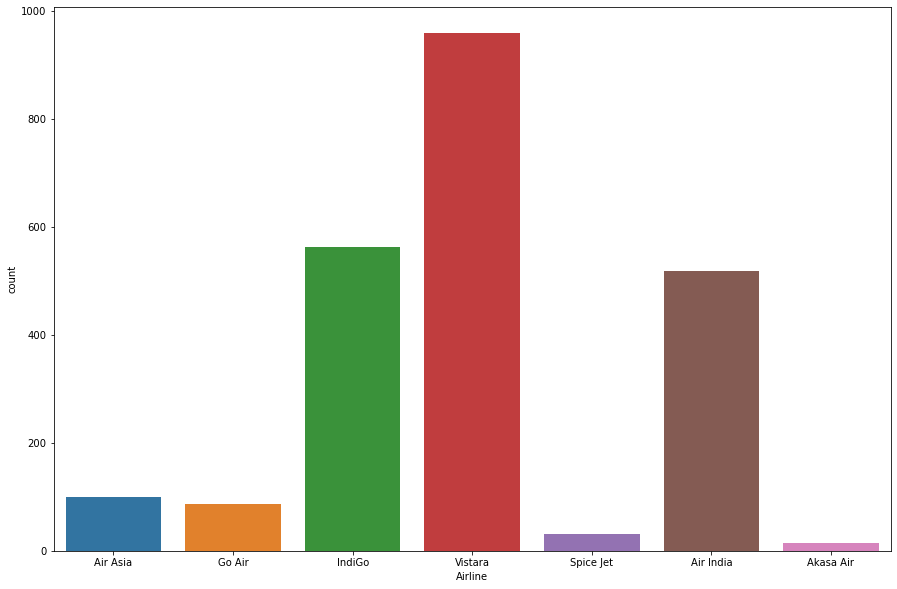

In [186]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x="Airline", data=data)
print(data["Airline"].value_counts())

In [187]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Airline"])
data["Airline"]=df

1     475
10    294
29    293
31    282
15    197
24    173
5     151
20     96
2      91
30     89
27     79
28     19
8      18
12     13
Name: Date of Journey, dtype: int64


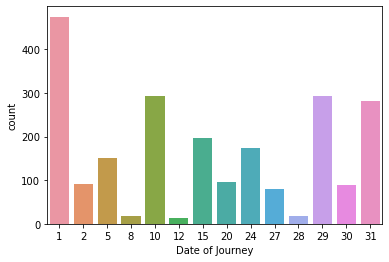

In [188]:
ax=sns.countplot(x="Date of Journey", data=data)
print(data["Date of Journey"].value_counts())

December    1143
November     845
October      282
Name: Month of Journey, dtype: int64


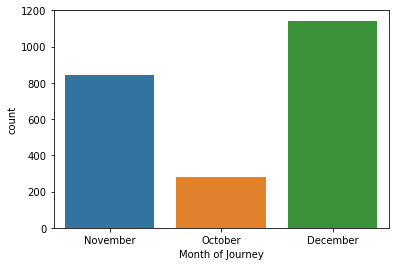

In [189]:
ax=sns.countplot(x="Month of Journey", data=data)
print(data["Month of Journey"].value_counts())

In [190]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Month of Journey"])
data["Month of Journey"]=df

Mumbai       576
Banglore     490
Delhi        475
Kolkata      324
Ahmedabad     96
Hyderabad     91
Chennai       79
Guwahati      73
Lucknow       19
Nagpur        18
Indore        16
Raipur        13
Name: Source, dtype: int64


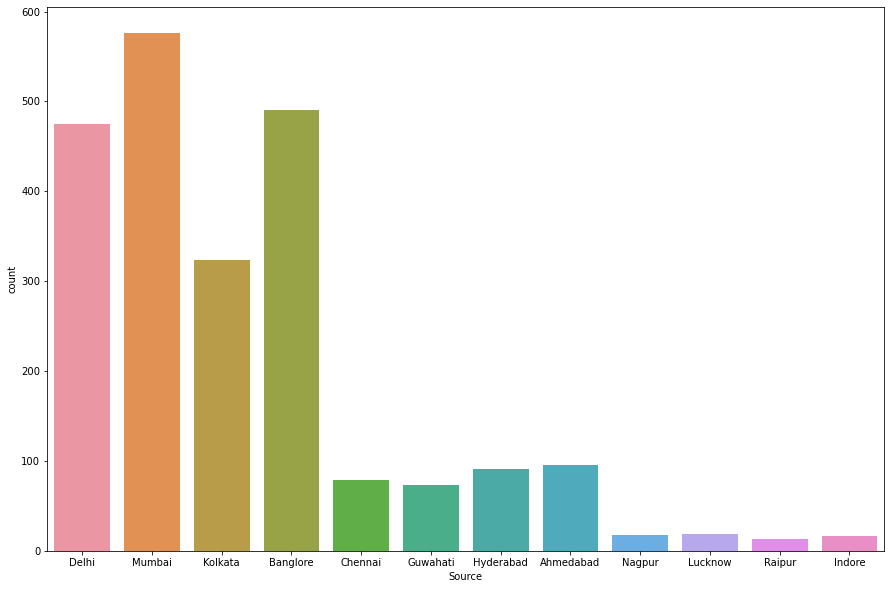

In [191]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x="Source", data=data)
print(data["Source"].value_counts())

In [192]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Source"])
data["Source"]=df

Mumbai       572
Delhi        455
Kolkata      393
Banglore     294
Bangalore    151
Hyderabad     96
Ahmedabad     91
Guwahati      79
Chennai       73
Nagpur        19
Lucknow       18
Raipur        16
Indore        13
Name: Destination, dtype: int64


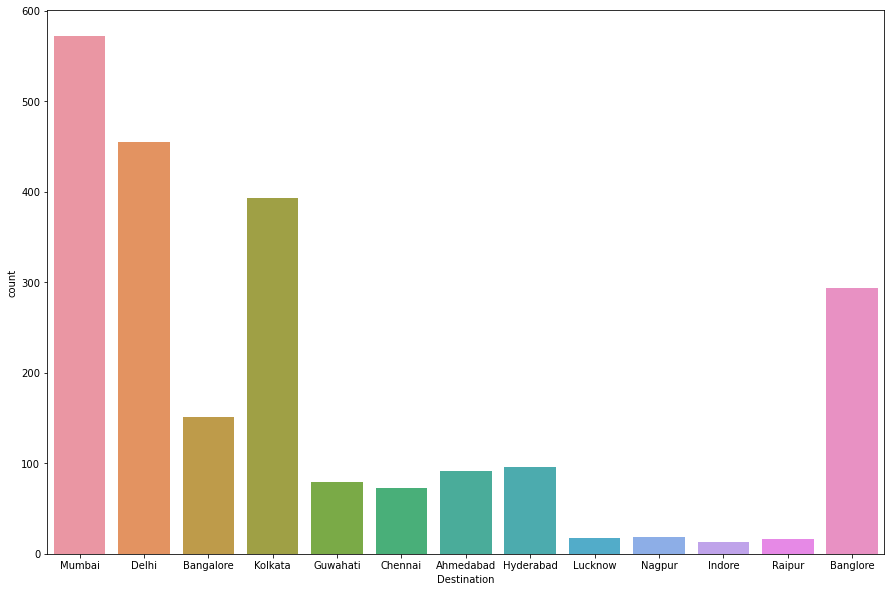

In [193]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x="Destination", data=data)
print(data["Destination"].value_counts())

In [194]:
#Replacing redundant airline names
data['Destination']=data['Destination'].replace('Bangalore', 'Banglore')

Mumbai       572
Delhi        455
Banglore     445
Kolkata      393
Hyderabad     96
Ahmedabad     91
Guwahati      79
Chennai       73
Nagpur        19
Lucknow       18
Raipur        16
Indore        13
Name: Destination, dtype: int64


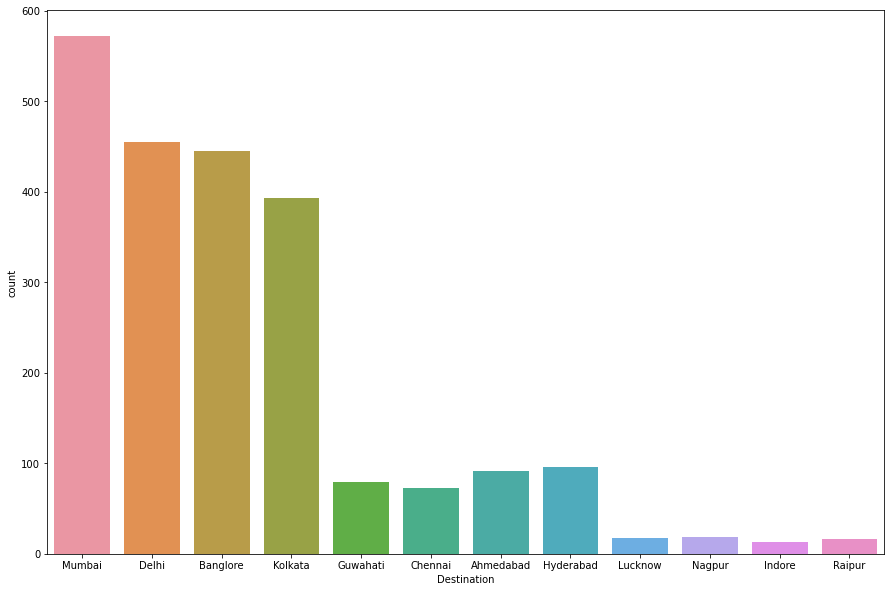

In [195]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x="Destination", data=data)
print(data["Destination"].value_counts())

In [196]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Destination"])
data["Destination"]=df

07:00    52
22:45    39
10:25    36
19:00    36
06:00    35
         ..
01:40     1
20:50     1
09:10     1
22:05     1
19:25     1
Name: Departure Time, Length: 243, dtype: int64


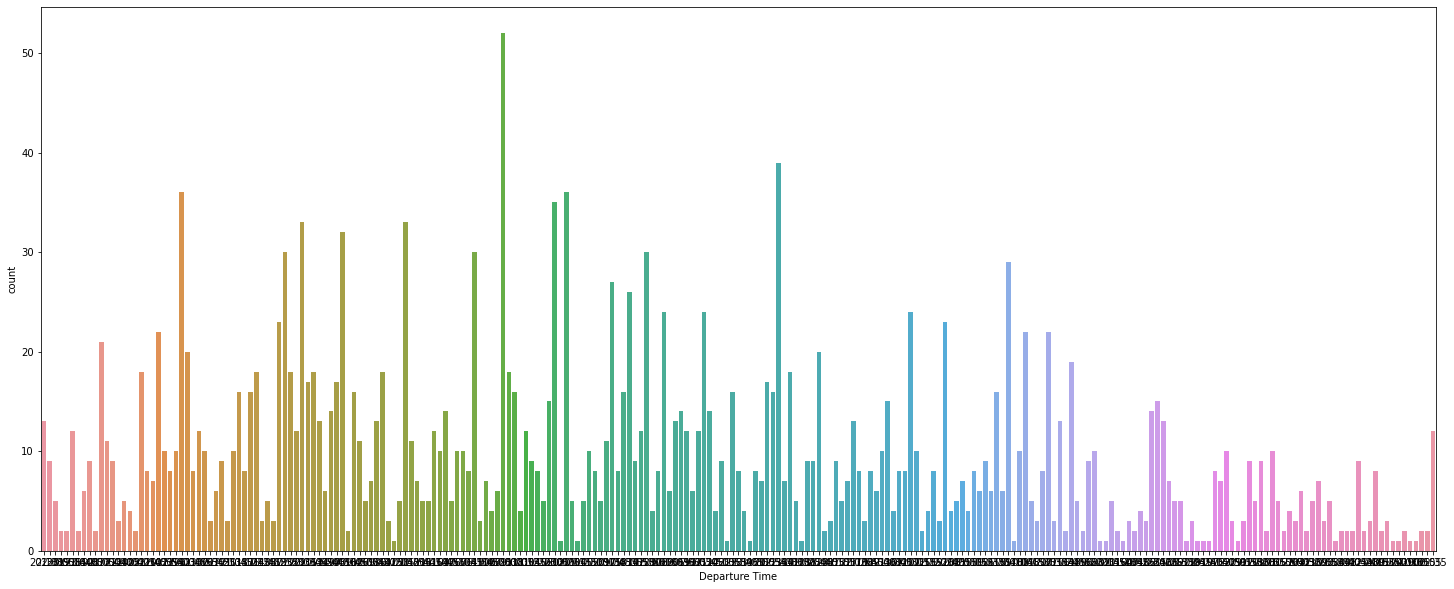

In [197]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Departure Time", data=data)
print(data["Departure Time"].value_counts())

In [198]:
#Converting time to continous number
d=data["Departure Time"]

In [199]:
dd=[]
for i in d:
    dd.append(i[0:2]+i[3:5])

In [200]:
data["Departure Time"]=dd

In [201]:
data["Departure Time"]=data["Departure Time"].astype(int)

23:20    74
19:55    52
00:05    51
18:50    47
22:40    47
         ..
18:35     1
12:45     1
17:50     1
11:40     1
17:10     1
Name: Arrival Time, Length: 243, dtype: int64


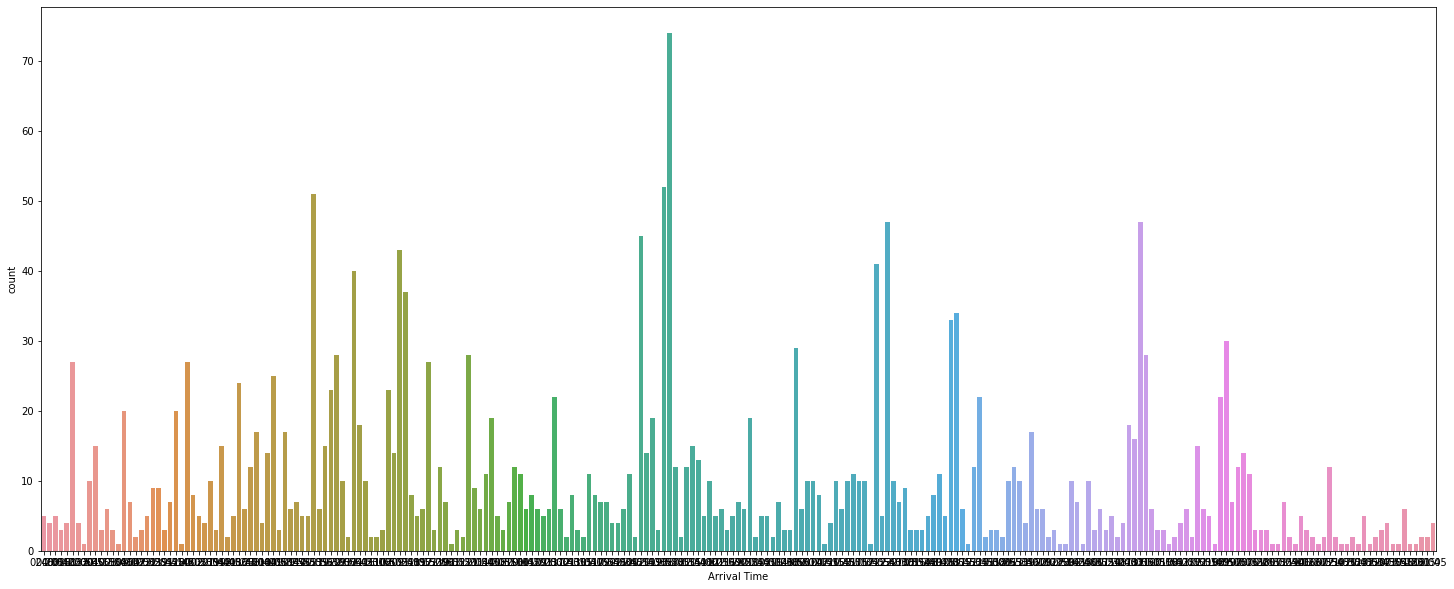

In [202]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Arrival Time", data=data)
print(data["Arrival Time"].value_counts())

In [203]:
#Converting time to continous number
da=data["Arrival Time"]

In [204]:
d=[]
for i in da:
    d.append(i[0:2]+i[3:5])

In [205]:
data["Arrival Time"]=d

In [206]:
data["Arrival Time"]=data["Arrival Time"].astype(int)

02h 15m    47
02h 10m    32
02h 05m    22
06h 25m    20
05h 50m    20
           ..
7h 15m      1
7h 55m      1
8h 45m      1
3h 50m      1
13h 3m      1
Name: Duration, Length: 507, dtype: int64


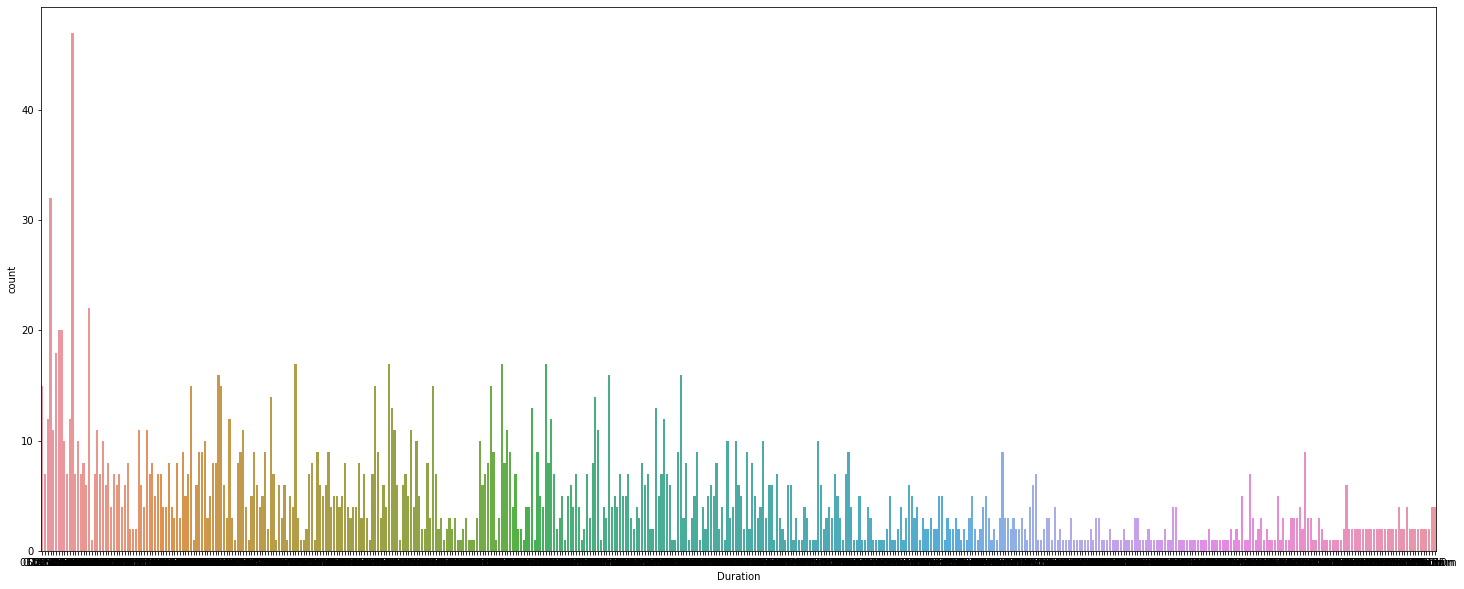

In [207]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Duration", data=data)
print(data["Duration"].value_counts())

In [208]:
#Converting time to continous number
dur=data["Duration"]

In [209]:
dt_d=[]
dt_h=[]
dt_m=[]
for i in dur:
    d=""
    b=""
    c=""
    d1=0
    x=0
    y=0
    
    for a in range(0,len(i)):
        if i[a]=='d':
            d1=a
            d=i[0:d1]
            dt_d.append(d)
            
    for a in range(0,len(i)):
        if i[a]=='h':
            x=a
            if d1>0:
                b=i[d1+2:x] 
            else:
                b=i[0:x]
            dt_h.append(b)
            
    for a in range(0,len(i)):       
        if i[a]=='m':
            y=a
            if x>0:
                c=i[x+2:y] 
            else:
                c=i[0:y]
            dt_m.append(c)
    if d=="":
        dt_d.append('0')
    if b=="":
        dt_h.append('0')
    if c=="":
        dt_m.append('0')  

In [210]:
#converting duration into minutes
dh=[]
a=0
for i in dt_h:
    l=int(i)
    z=int(dt_d[a])
    j=int(dt_m[a])
    k=(z*24*60)+(l*60)+j
    dh.append(k)
    a=a+1

In [212]:
data['Duration']=dh

1 Stop       1504
2 Stop        332
Non Stop      253
2 Stop(s)     104
1 stop         44
2 stop         15
3 Stop(s)      11
Non stop        6
3 stop          1
Name: Total Stops, dtype: int64


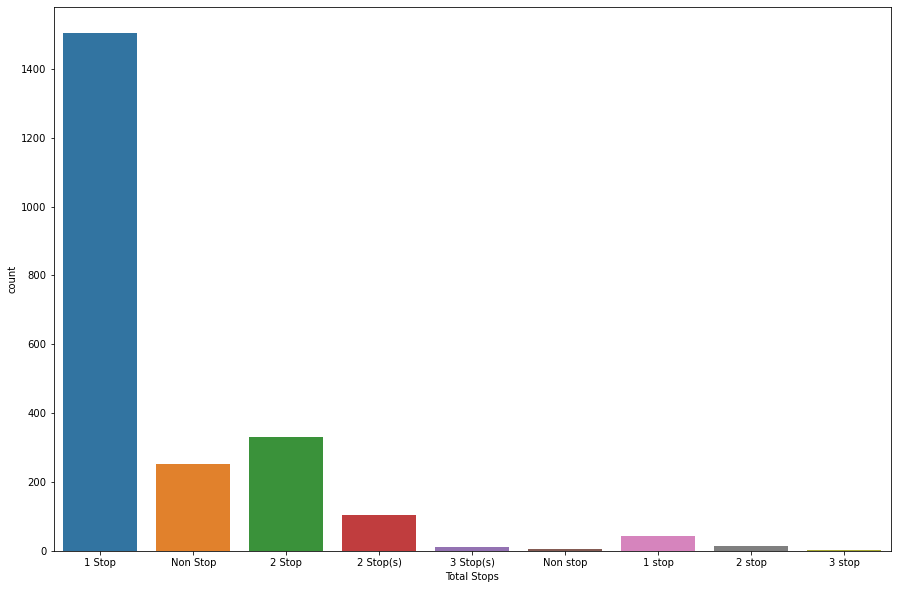

In [213]:
plt.figure(figsize=(15,10))
ax=sns.countplot(x="Total Stops", data=data)
print(data["Total Stops"].value_counts())

In [214]:
#Replacing redundant stop names
data['Total Stops']=data['Total Stops'].replace('1 Stop', 1)
data['Total Stops']=data['Total Stops'].replace('2 Stop', 2)
data['Total Stops']=data['Total Stops'].replace('Non Stop', 0)
data['Total Stops']=data['Total Stops'].replace('2 Stop(s)', 2)
data['Total Stops']=data['Total Stops'].replace('1 stop', 1)
data['Total Stops']=data['Total Stops'].replace('2 stop', 2)
data['Total Stops']=data['Total Stops'].replace('3 Stop(s)', 3)
data['Total Stops']=data['Total Stops'].replace('Non stop', 0)
data['Total Stops']=data['Total Stops'].replace('3 stop', 3)

1    1548
2     451
0     259
3      12
Name: Total Stops, dtype: int64


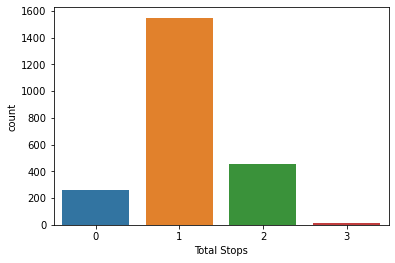

In [215]:
ax=sns.countplot(x="Total Stops", data=data)
print(data["Total Stops"].value_counts())

In [216]:
pr=list(data["Price"])

In [217]:
l=len(pr)
for j in range(0,l):
    pr[j]=pr[j].replace(",","")

In [218]:
data["Price"]=pr

In [219]:
data["Price"]=data["Price"].astype(int)

10070    70
12220    59
7308     42
14279    34
10529    30
         ..
12942     1
18071     1
18050     1
18040     1
16452     1
Name: Price, Length: 961, dtype: int64


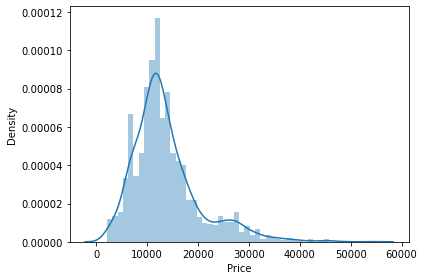

In [220]:
sns.distplot(data["Price"])
plt.xlabel("Price",fontsize=10)
plt.tight_layout()
print(data["Price"].value_counts())

In [221]:
#Statistical Analysis
data.describe()

,Airline,Date of Journey,Month of Journey,Source,Destination,Departure Time,Arrival Time,Duration,Total Stops,Price
count,2270.000000,2270.000000,2270.000000,2270.000000,2270.000000,2270.000000,2270.000000,2270.000000,2270.000000,2270.000000
mean,3.947577,15.970485,0.620705,4.776652,4.951101,1324.852423,1504.612335,767.390749,1.095154,13705.897797
std,2.126950,11.696828,0.695774,3.281139,3.245200,574.623327,649.520421,484.064937,0.570096,6729.656157
min,0.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,63.000000,0.000000,2126.000000
25%,1.000000,5.000000,0.000000,1.000000,2.000000,800.000000,1011.250000,385.000000,1.000000,9739.250000
50%,4.000000,15.000000,0.000000,3.000000,4.000000,1320.000000,1655.000000,680.000000,1.000000,12225.000000
75%,6.000000,29.000000,1.000000,9.000000,9.000000,1835.000000,2025.000000,1085.000000,1.000000,16062.000000
max,6.000000,31.000000,2.000000,11.000000,11.000000,2355.000000,2355.000000,2460.000000,3.000000,54039.000000


# Checking Correlation

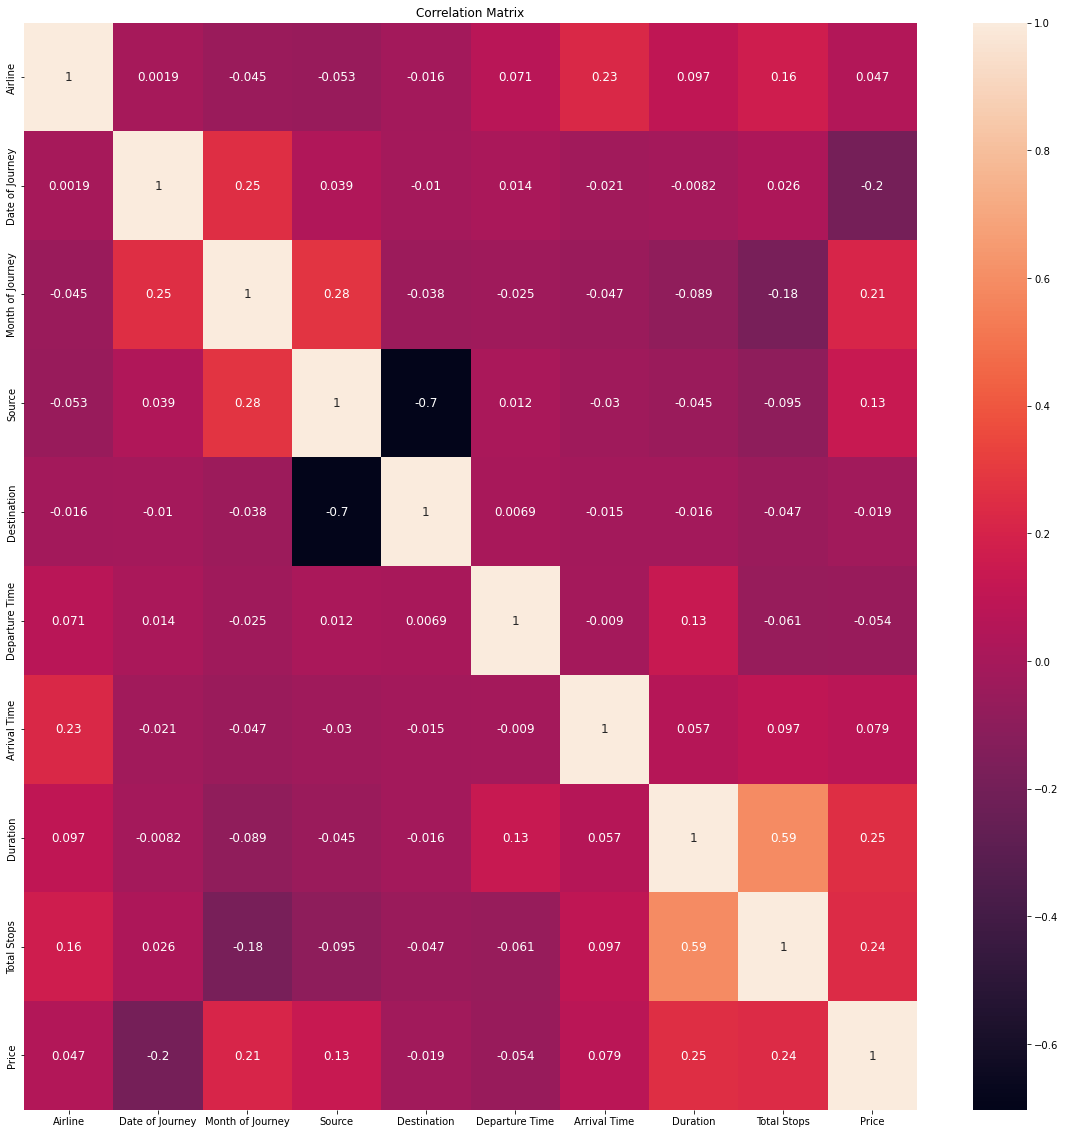

In [222]:
#Lets view the heatmap
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=[20,20])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True, annot_kws={'size':12})
plt.title("Correlation Matrix")
plt.show()

In [223]:
#Let's print the correlation coefficient for the Prediction with Price

corr_matrix=data.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price               1.000000
Duration            0.248551
Total Stops         0.235351
Month of Journey    0.209234
Source              0.131165
Arrival Time        0.078749
Airline             0.047292
Destination        -0.019074
Departure Time     -0.054397
Date of Journey    -0.197196
Name: Price, dtype: float64

# Checking for outliers

In [224]:
data.shape

(2270, 10)

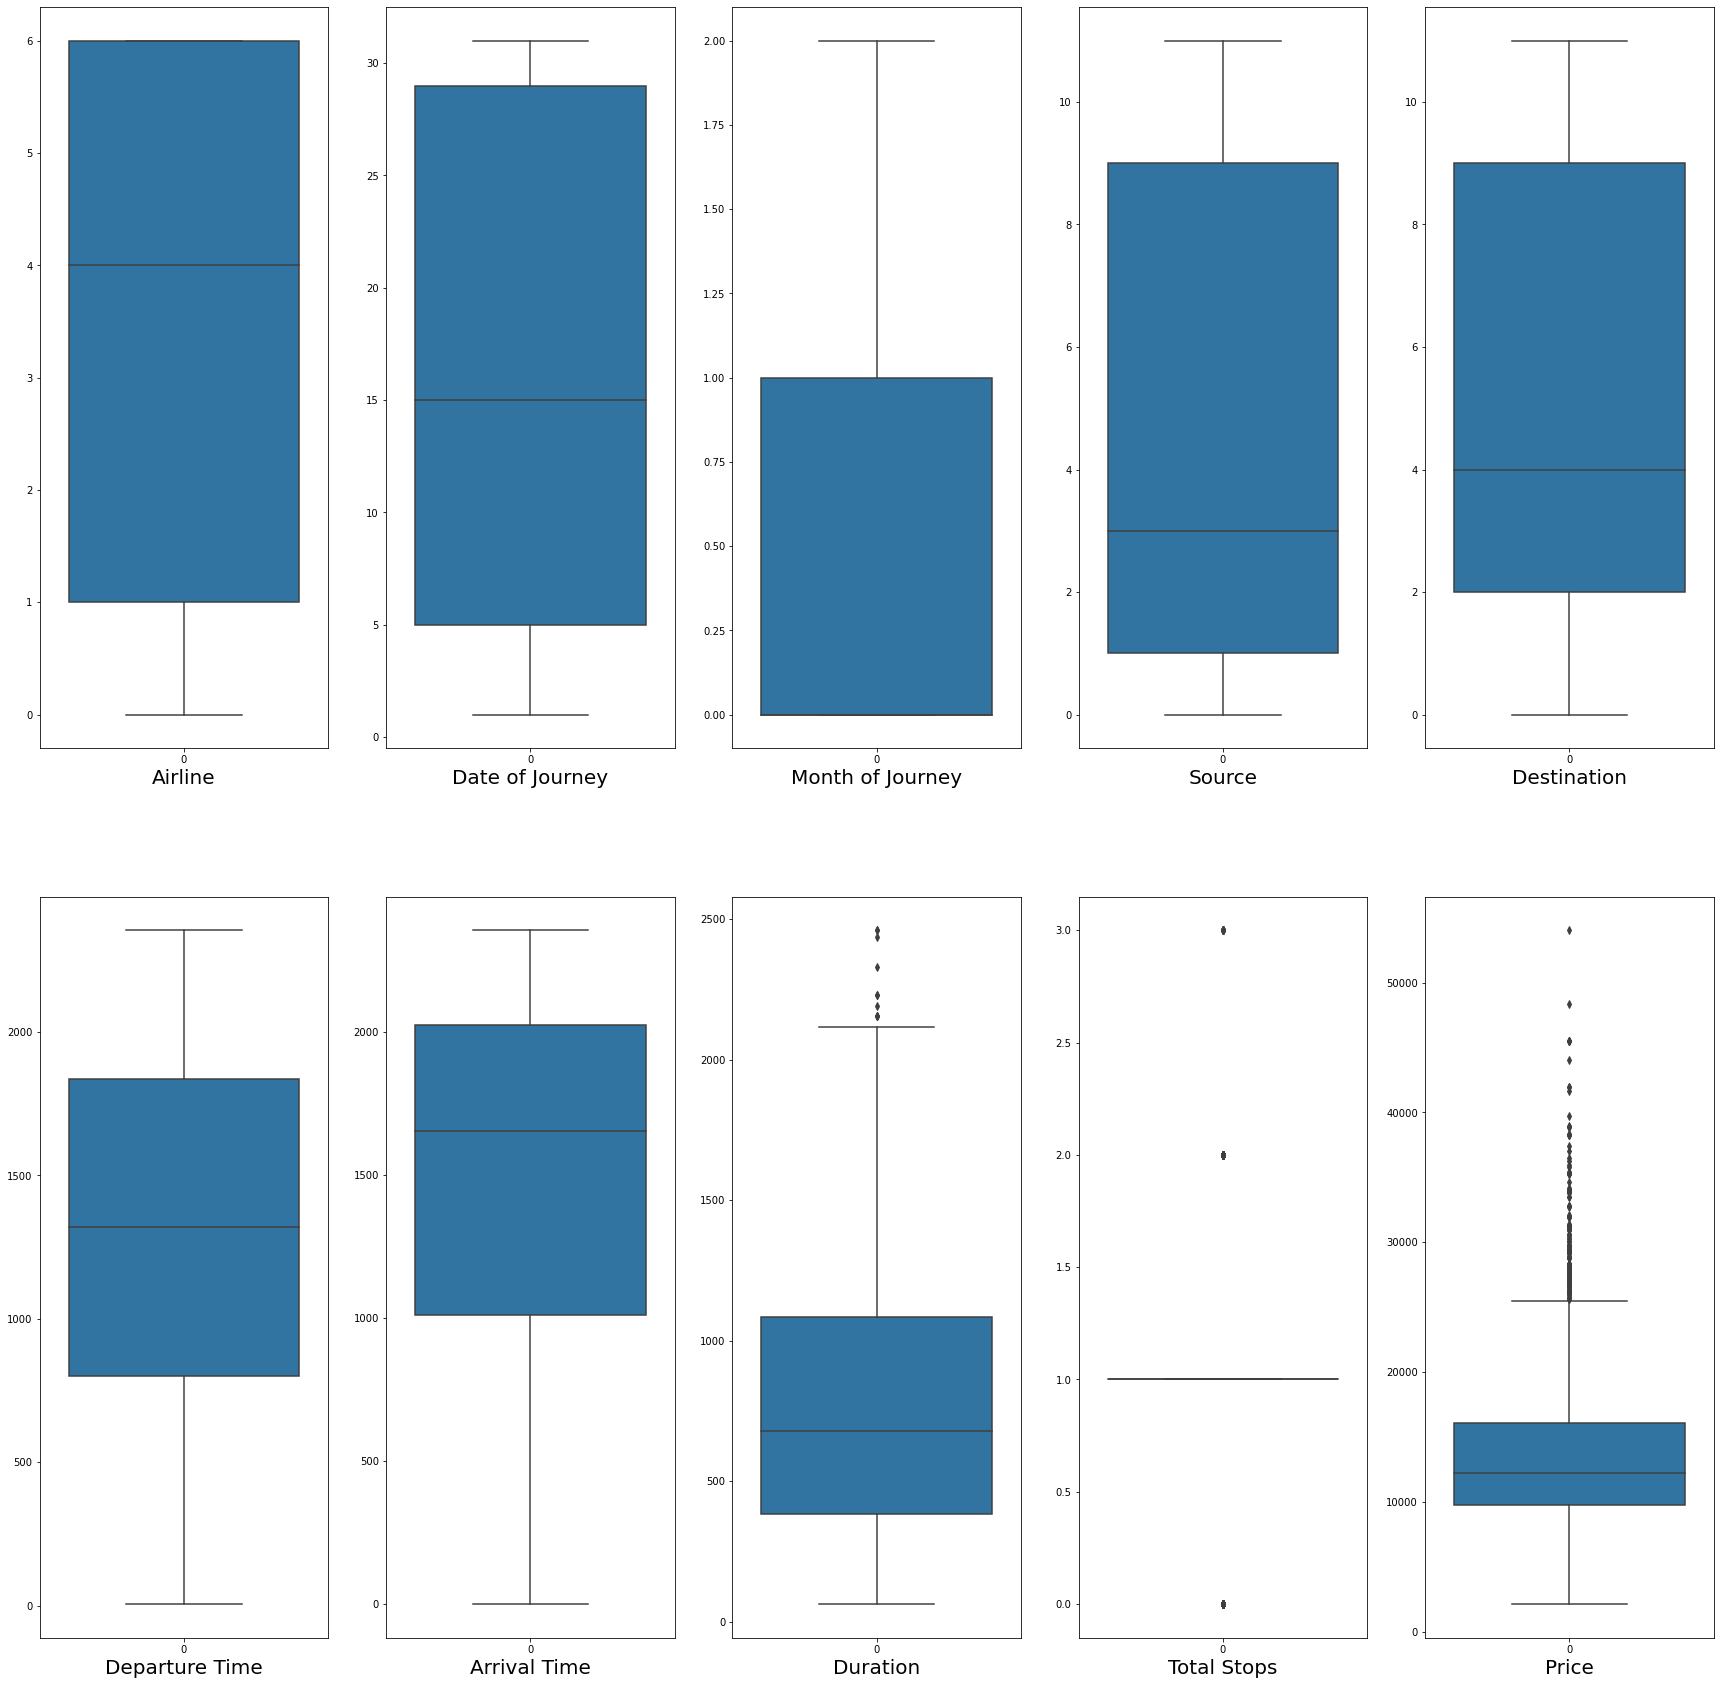

In [225]:
#visulaize the outliers using boxplot
plt.figure(figsize=(30,30))
graph=1

for column in data:
    if graph<=10:
        ax=plt.subplot(2,5,graph)
        sns.boxplot(data=data[column], orient='v')
        plt.xlabel(column,fontsize=20)
    graph=graph+1
plt.show()

In [226]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z.shape

(2270, 10)

In [227]:
threshold=3
print(np.where(z>3))

(array([ 262,  263,  264,  265,  266,  267,  268,  269,  270,  271,  272,
        273,  274,  275,  276,  277,  278,  555,  558,  559,  560,  650,
        701,  704,  705,  706,  707,  708,  709,  710,  711,  841,  933,
        934,  935,  936,  937,  957,  958,  959,  960,  961, 1233, 1284,
       1509, 1626, 1680, 1681, 1682, 1909, 1910, 2202, 2203], dtype=int64), array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       9, 7, 9, 9, 9, 7, 7, 7, 7], dtype=int64))


In [228]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(2270, 10)
(2217, 10)


# 
As the data loss is 2.3%, outlier removal is considered

# Divide Data Set into features and labels

In [229]:
y=data_new['Price']
x=data_new.drop(columns=['Price'])

# Visualizing Relationship

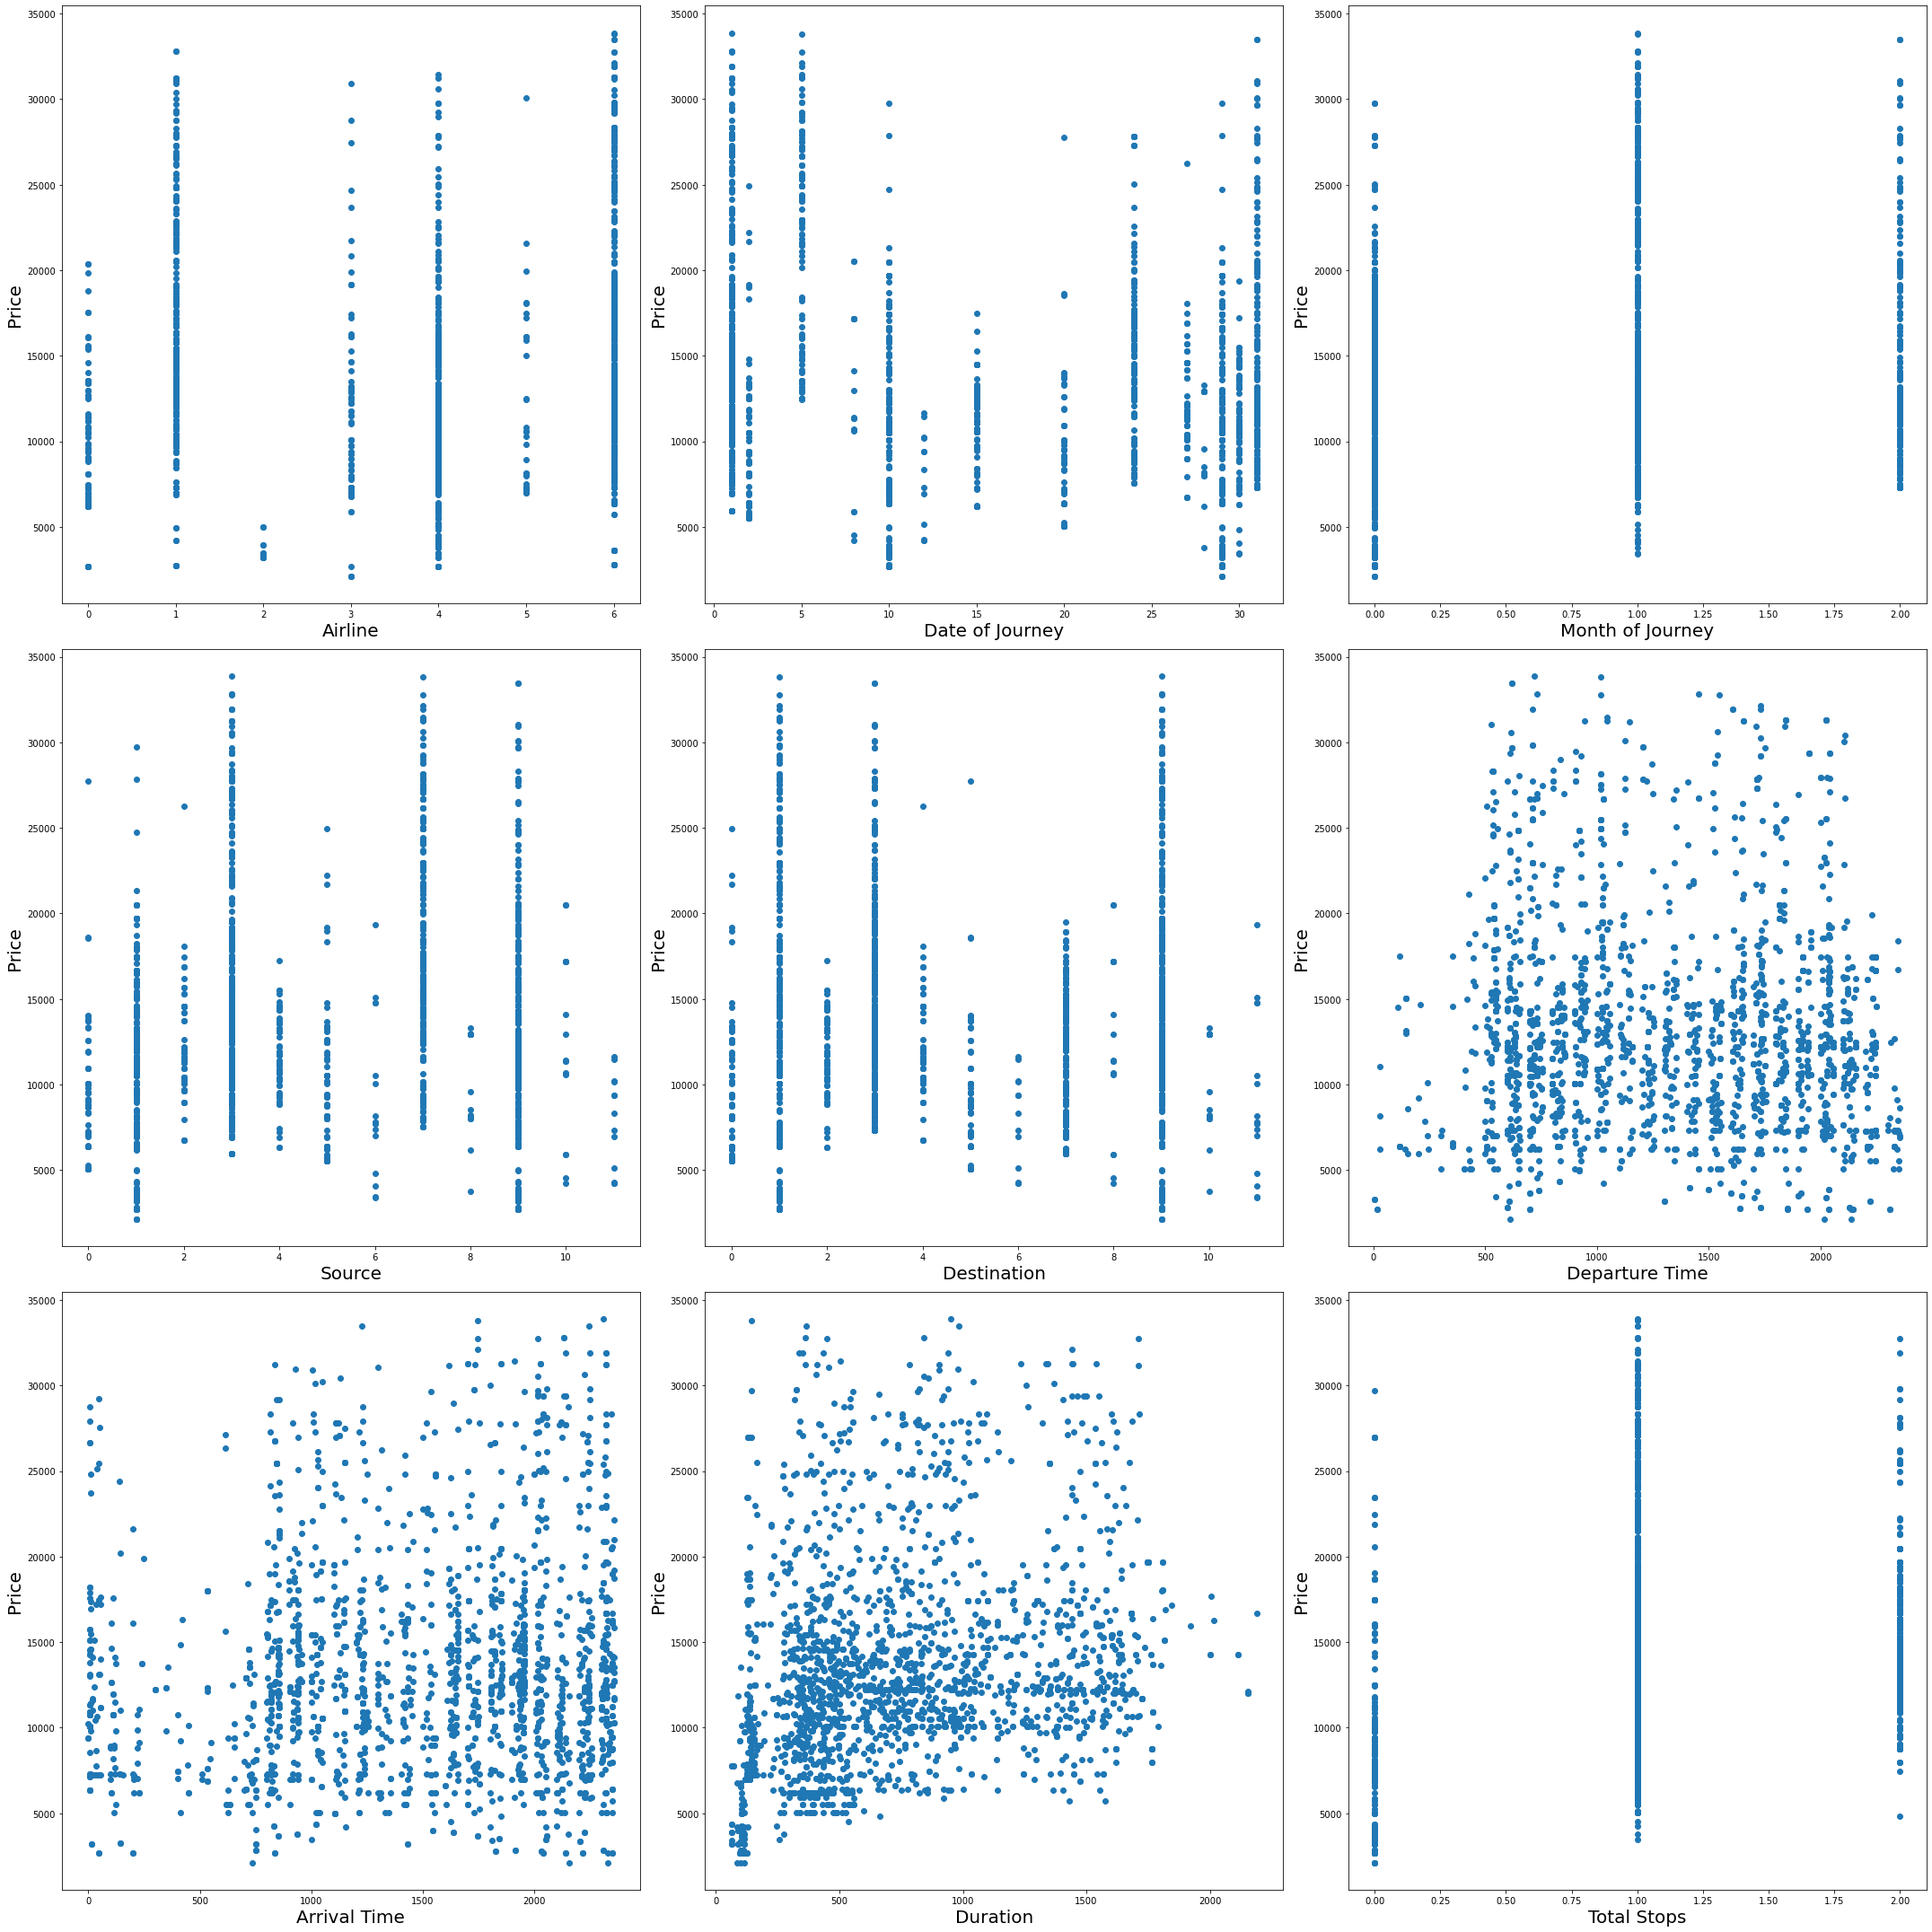

In [230]:
plt.figure(figsize=(30,30))
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price', fontsize=20)
    plotnumber=plotnumber+1
plt.tight_layout()

# Checking for skewness

In [231]:
x.skew().sort_values(ascending=False)

Month of Journey    0.693280
Duration            0.548951
Source              0.145235
Destination         0.051229
Total Stops         0.030756
Departure Time     -0.004913
Date of Journey    -0.013968
Airline            -0.524608
Arrival Time       -0.610788
dtype: float64

# Transforming Data to remove skewness

In [232]:
from sklearn.preprocessing import power_transform
x_n=power_transform(x)

In [233]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_n, columns=x.columns)
x_skew.skew().sort_values(ascending=False)

Month of Journey    0.186085
Total Stops         0.012559
Duration           -0.098262
Source             -0.142408
Departure Time     -0.152642
Destination        -0.178363
Date of Journey    -0.297224
Airline            -0.412902
Arrival Time       -0.564165
dtype: float64

# Scaling the data

In [234]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_skew)

# Splitting data into train and test data

In [235]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr=LinearRegression()

#Finding Best random state
for i in range(0,100):
    features_train, features_test, target_train, target_test= train_test_split(X_scaled, y, test_size=0.2, random_state=i)
    lr.fit(features_train, target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print("At random state ",i, "the training accuracy is:- ",r2_score(target_train,pred_train))
    print("At random state ",i, "the testing accuracy is:- ",r2_score(target_test,pred_test))
    print("\n")

At random state  0 the training accuracy is:-  0.2754852878701479
At random state  0 the testing accuracy is:-  0.3312319722590471


At random state  1 the training accuracy is:-  0.2874354368611691
At random state  1 the testing accuracy is:-  0.2898164647797843


At random state  2 the training accuracy is:-  0.28928895205305494
At random state  2 the testing accuracy is:-  0.2832286848781077


At random state  3 the training accuracy is:-  0.29376290643572467
At random state  3 the testing accuracy is:-  0.2622716885273606


At random state  4 the training accuracy is:-  0.28910788138564103
At random state  4 the testing accuracy is:-  0.28278651060137594


At random state  5 the training accuracy is:-  0.2990812702097011
At random state  5 the testing accuracy is:-  0.24277377160967528


At random state  6 the training accuracy is:-  0.29893254252097423
At random state  6 the testing accuracy is:-  0.2265024642539517


At random state  7 the training accuracy is:-  0.29284032205776

# Using Linear Regression Model

In [236]:
#Applying the best random state found(i.e. 1)

features_train, features_test, target_train, target_test= train_test_split(X_scaled, y, test_size=0.2, random_state=1)
lr.fit(features_train, target_train)
pred_test=lr.predict(features_test)
print(r2_score(target_test,pred_test))

0.2898164647797843


# Cross Validation of the model

In [237]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold ",j," the cv score is ", cv_mean," and accuracy score for the training is ",Train_accuracy," and the accuracy score for the testing is ",Test_accuracy)
    print("\n")

At cross fold  2  the cv score is  -8.302928120136743  and accuracy score for the training is  -0.294294628592044  and the accuracy score for the testing is  0.2898164647797843


At cross fold  3  the cv score is  -1.2236082150035101  and accuracy score for the training is  -0.294294628592044  and the accuracy score for the testing is  0.2898164647797843


At cross fold  4  the cv score is  -0.13828042020488146  and accuracy score for the training is  -0.294294628592044  and the accuracy score for the testing is  0.2898164647797843


At cross fold  5  the cv score is  -0.3241128154180129  and accuracy score for the training is  -0.294294628592044  and the accuracy score for the testing is  0.2898164647797843


At cross fold  6  the cv score is  -0.785686757431627  and accuracy score for the training is  -0.294294628592044  and the accuracy score for the testing is  0.2898164647797843


At cross fold  7  the cv score is  -0.22292176100612168  and accuracy score for the training is  -0.2

# 
Since the number of folds don't have such impact on the accuracy and cv score. So cv=9 is selected

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score

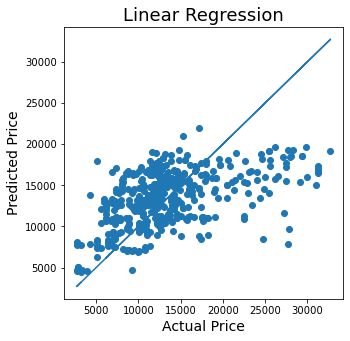

In [238]:
plt.figure(figsize=(5,5))
plt.scatter(x=target_test, y=pred_test)
plt.plot(target_test, target_test)
plt.xlabel('Actual Price', fontsize=14)
plt.ylabel('Predicted Price', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

# 
The best fit line passes through most of the points

# Regularization

In [239]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001, .001, .01,.1, 1, 10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [240]:
ls=Lasso(alpha=10, random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train, target_train)
pred_ls=ls.predict(features_test)

lss=r2_score(target_test,pred_ls)
lss

0.2905012729089951

In [241]:
cv_score=cross_val_score(ls,X_scaled,y,cv=4)
cv_mean=cv_score.mean()
cv_mean

-0.1312253501136659

# Using Random Forest Regressor Model

In [242]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'], 'max_features':["auto", "sqrt", "log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [243]:
rf=RandomForestRegressor(criterion="mse", max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('R2 Score: ', rfs*100)

rfscore=cross_val_score(rf,X_scaled,y,cv=5)
rfc=rfscore.mean()
print("Cross Val Score:", rfc*100)

R2 Score:  69.54875442721493
Cross Val Score: -69.30283900666488


# Using Ada Boost Regressor Model

In [244]:
from sklearn.ensemble import AdaBoostRegressor
parameters={'n_estimators':np.arange(10,100), 'learning_rate':np.arange(0.01,0.1)}
ad=AdaBoostRegressor()
clf=GridSearchCV(ad,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'learning_rate': 0.01, 'n_estimators': 87}


In [245]:
ad=AdaBoostRegressor(n_estimators=87, learning_rate=0.01)
ad.fit(features_train, target_train)
ad.score(features_train, target_train)
pred_decision=ad.predict(features_test)

ads=r2_score(target_test,pred_decision)
print('R2 Score: ', ads*100)

adscore=cross_val_score(ad,X_scaled,y,cv=4)
adc=adscore.mean()
print("Cross Val Score:", adc*100)

R2 Score:  48.00182232541624
Cross Val Score: -19.226086317563897


# The R2 score of Random Forest Regressor is 69.54% and CV score of Random Forest Regressor is -69.30%. This is the best working model